# Fashion-MNIST
#### Leead Jacobowitz 313308785

Contex:
- In this project I will be creating a classifying model inorder to classify the Fashion-MNIST dataset.
- The Fashion-MNIST dataset consists a training set of 60,000 examples and a test set of 10,000 examples.
- Each example is a 28x28 pixel grayscale image, associated with a label from 10 classes.
- The pixel value is an integer between 0 and 255.
- The dataset is divided into 785 columns. The first colum consists of the class labels which represents the type of clothing. The rest of the 784 columns contain the pixel value of the associated image.

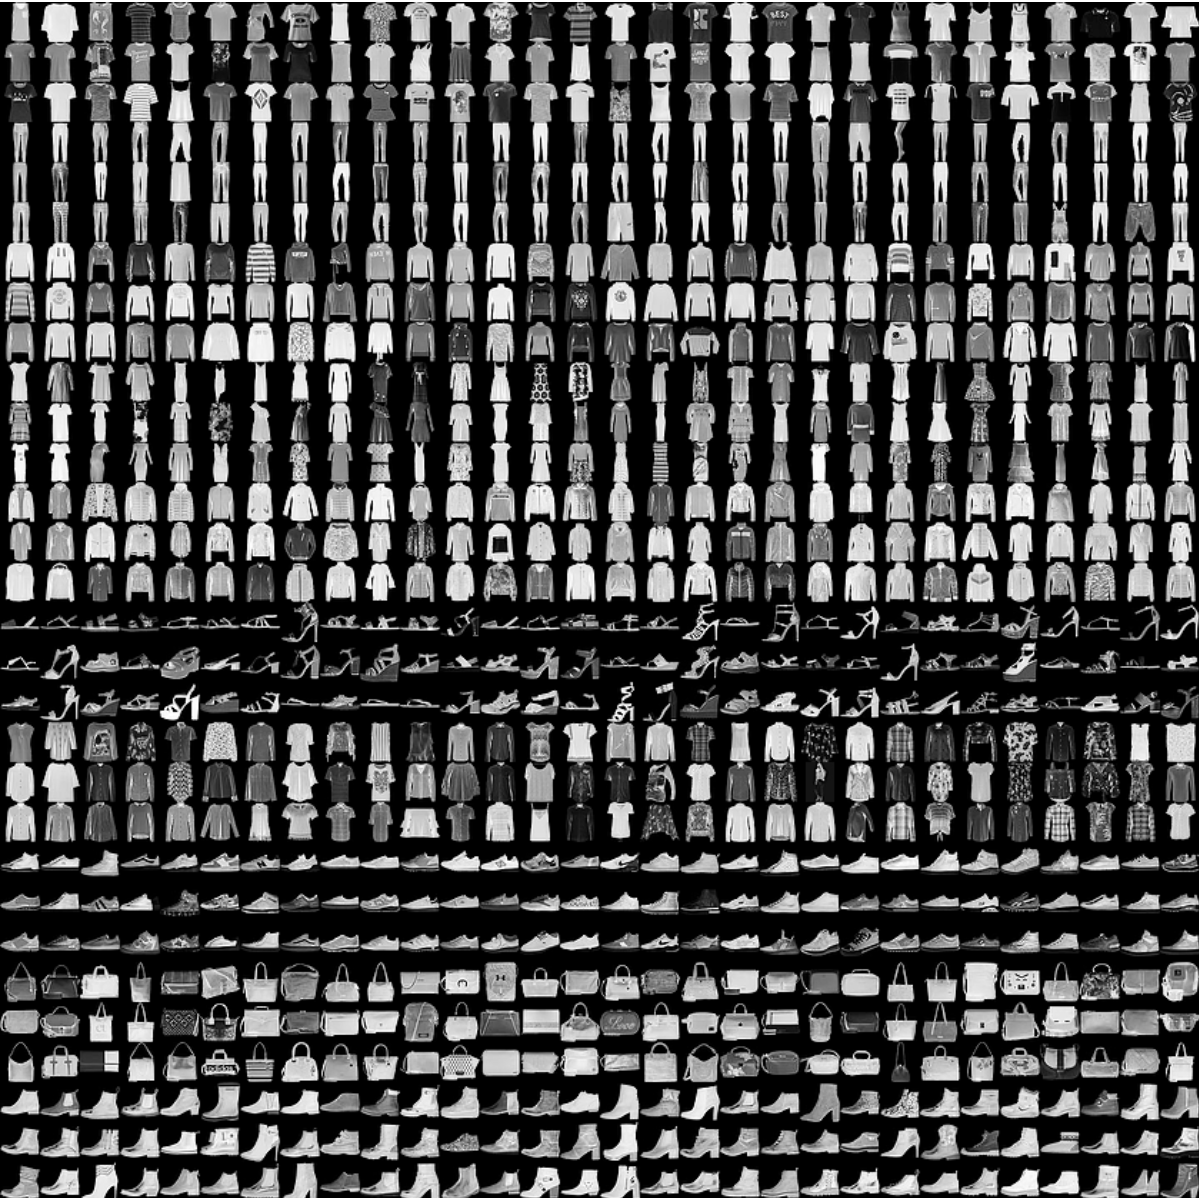

##### Importing the data

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_csv = r"C:\Users\Leead\Desktop\לימודים\הדמיית נתונים\פרוייקט גמר\Fashion-MNIST\fashion-mnist_train.csv"
test_csv = r"C:\Users\Leead\Desktop\לימודים\הדמיית נתונים\פרוייקט גמר\Fashion-MNIST\fashion-mnist_test.csv"
df_train = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)

In [109]:
df_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


- Here we can see which article of clothing each number represents:

In [111]:
f = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
values = ["0","1","2","3",'4','5','6','7','8','9']
table=pd.DataFrame({"Clothing":f,"Label":values})
table.sort_values("Label")

,Clothing,Label
0,T-shirt/top,0
1,Trouser,1
2,Pullover,2
3,Dress,3
4,Coat,4
5,Sandal,5
6,Shirt,6
7,Sneaker,7
8,Bag,8
9,Ankle boot,9


- Here we have a visualization of the first 25 rows.

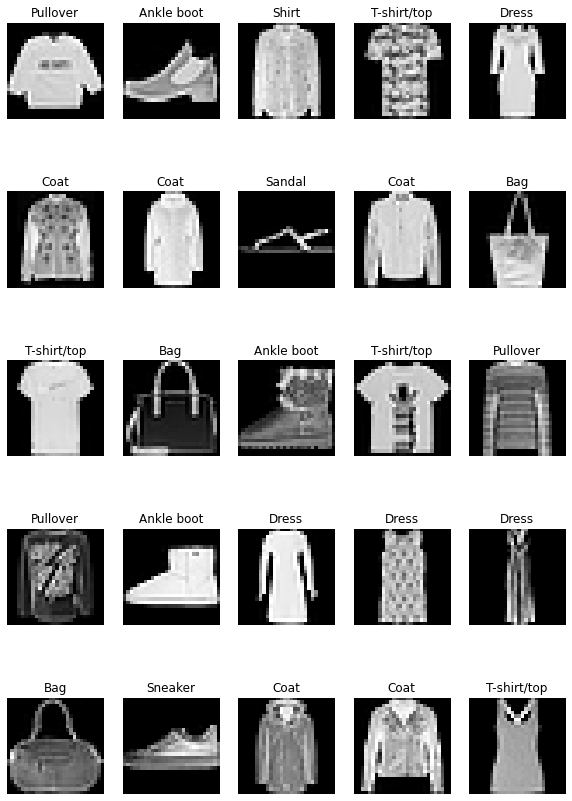

In [112]:
def load_images(filename: str):
    images = pd.read_csv(filename)
    return (images.iloc[:, 1:].values.astype(np.uint8),
            images.iloc[:, 0].values.astype(np.uint8))

X_t, y_t = load_images(train_csv)

classes = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(5, 5, figsize=(10, 15))

for i in range(5):
    for j in range(5):
        image = X_t[i * 5 + j]
        label = y_t[i * 5 + j]
        ax[i][j].imshow(image.reshape(28, 28),
                        cmap='gray')
        ax[i][j].set_title(classes[label])
        ax[i][j].axis('off')

plt.show()

- Below we can see a graph showing that the data is well sampled. Each class is distributed equally and therefor the data will not  overfit to a particular set of samples.

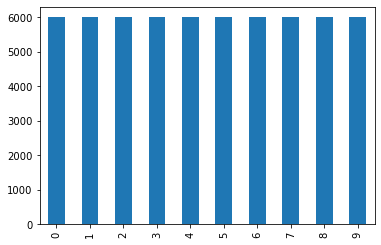

In [113]:
df_train.label.value_counts().plot(kind='bar')
plt.show()

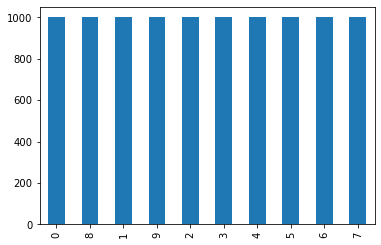

In [115]:
df_test.label.value_counts().plot(kind='bar')
plt.show()

##### Cleaning the data
- The data is very clean, there are no null accounts.
- I will split the data into features and labels.

In [116]:
y_train = df_train.iloc[:,0]
x_train = df_train.iloc[:,1:]
y_test = df_test.iloc[:,0]
x_test = df_test.iloc[:,1:]

In [117]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
y_train.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

##### Scaling the training and testing data by dividing by the amont of pixels in the grayscale (255):

In [119]:
x_train = x_train.divide(other = 255)
x_test = x_test.divide(other=255)

##### PCA (Principal Component Analysis)
- There are 784 dimensions(features), that is too many and can cause a lot of noise.
- I will be using PCA which is a dimensionality-reduction method in order to make the model more efficient.
- I will be lossing a bit of accuracy but it will be worth the simplicity and better runtime.
- I will keep the default 95% n_components.

##### Training data reduction:

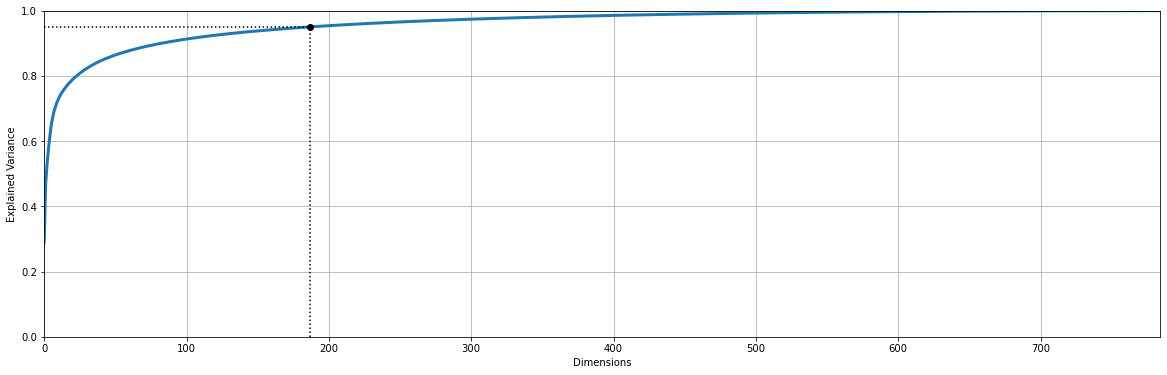

In [120]:
pca=PCA()
pca.fit(x_train)
cumilative_sum = np.cumsum(pca.explained_variance_ratio_)

pca_plt = plt.figure(figsize=(20,6))
pca_plt = plt.plot(cumilative_sum, linewidth=3)
pca_plt = plt.axis([0, 784, 0, 1])
pca_plt = plt.xlabel("Dimensions")
pca_plt = plt.ylabel("Explained Variance")
x = np.argmax(cumilative_sum >= 0.95) + 1
pca_plt = plt.plot([x, x], [0, 0.95], "k:")
pca_plt = plt.plot([0, x], [0.95, 0.95], "k:")
pca_plt = plt.plot(x, 0.95, "ko")
plt.grid(True)
plt.show()

- Above we can see a graph of the Explained variance as a function of the number of dimensions. 
- The Explained variance indicates the proportion of the dataset's variance the lies along the axis of each component.
- We can see the elbow in the curve where the explained variance stops growing fast. It is at around 190.
- We can reduce the dimensionality down to about 190 and won't lose too much explained variance.
- I will check now how many dimensions we can reduce to exactly in order to maintain 95% variance.

In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(x_train)
reduced_train = pd.DataFrame(pca.transform(x_train))
reduced_train.shape[1]

187

##### Testing set reduction (n_components = 187)

In [124]:
pca_test = PCA(n_components = 187)
pca_test.fit(x_test)
reduced_test = pd.DataFrame(pca.transform(x_test))

##### XGBoost classifier:

In [125]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(reduced_train, y_train)
xgb_pred = xgb.predict(reduced_test)
print('XGBoost accuracy score: %.2f'%(xgb.score(reduced_test, y_test)*100),'%')

C:\Users\Leead\New folder\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 88.29 %


In [130]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report
target_names = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle boot']
report = classification_report(y_test, xgb_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.84      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.81      0.80      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.81      0.84      0.83      1000
      Sandal       0.96      0.93      0.94      1000
       Shirt       0.71      0.68      0.70      1000
     Sneaker       0.92      0.93      0.93      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Conclusion:
- In this project my goal was to build a classifying model for the Fashin-MNIST dataset.
- Using PCA I was able to decrease the amount of dimensions to 187 which allows the model to be a lot more simple and efficient.
- I decided to use a new model learned this semester, XGBoost.



- The total accuracy score is 88%